In [163]:
!pip3 install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import PowerTransformer, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,  make_scorer
from sklearn.utils import shuffle

In [165]:
df = pd.read_csv('car data.csv')

In [166]:
df.shape

(301, 9)

In [167]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [168]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [169]:
df.isnull().sum().sum()

0

In [170]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.duplicated().sum()

2


0

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [172]:
object_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(exclude=['int', 'float']).columns

In [173]:
for  col in object_cols:
    print(f'{col} >= {len(df[col].unique())}')

Car_Name >= 98
Fuel_Type >= 3
Selling_type >= 2
Transmission >= 2


In [174]:
label_encoder = LabelEncoder()
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Selling_type'] = label_encoder.fit_transform(df['Selling_type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])

In [175]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [176]:
df.drop('Car_Name', axis=1, inplace=True)

In [177]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


In [178]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,1.792642,0.354515,0.869565,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.422297,0.479168,0.337346,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,2.000000,0.000000,1.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,2.000000,0.000000,1.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,2.000000,1.000000,1.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


### Data Preprocessing

#### EDA

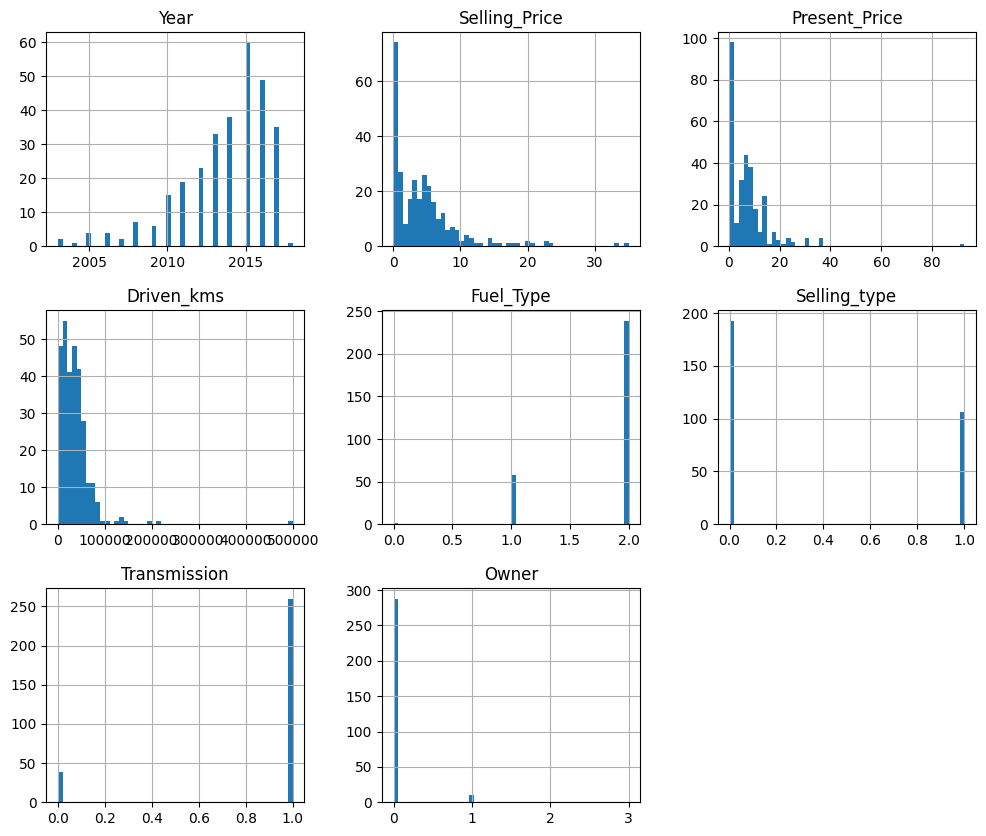

In [179]:
df.hist(figsize=(12, 10), bins=50)
plt.show()

In [180]:
df['driven_kms'] = np.log(df['Driven_kms'])
df['Selling_Price'] = np.log(df['Selling_Price'])
df['Present_Price'] = np.log(df['Present_Price'])

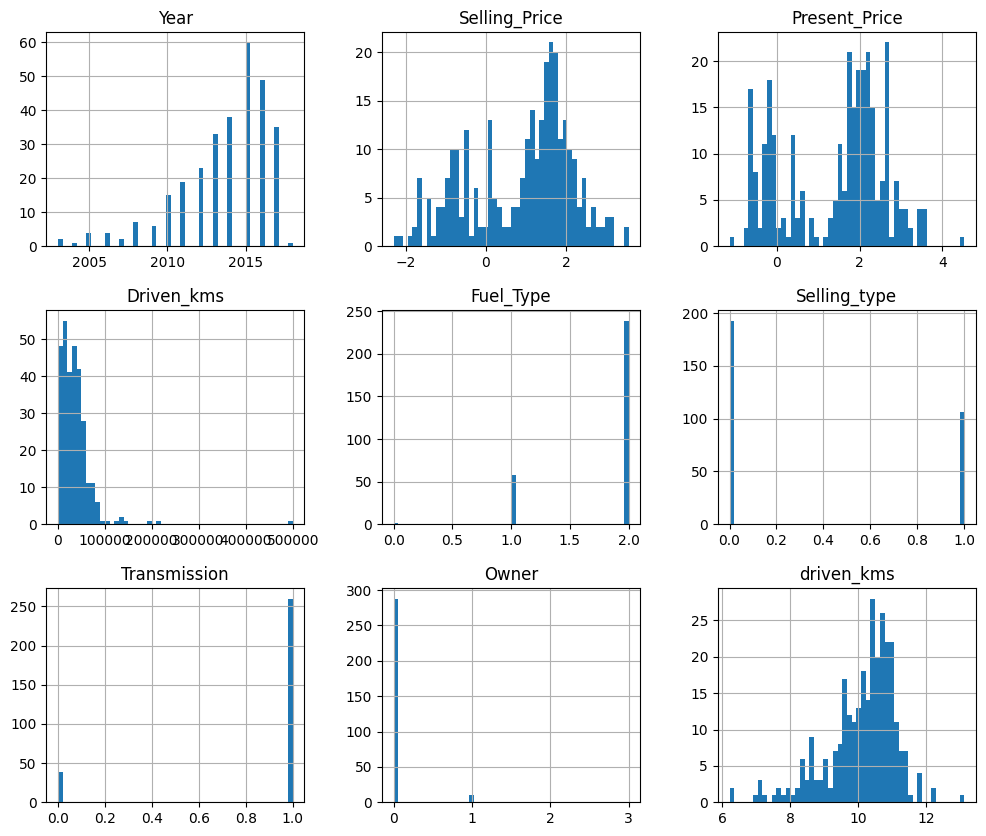

In [181]:
df.hist(figsize=(12, 10), bins=50)
plt.show()

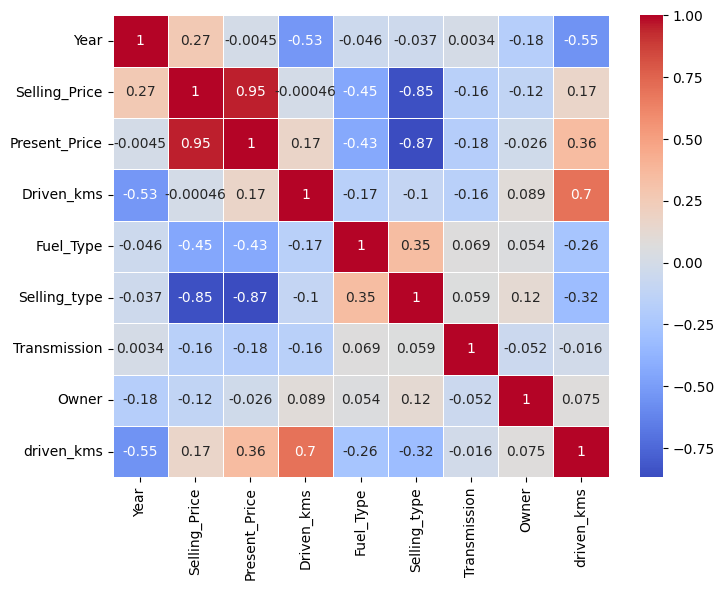

In [182]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

#### Features Selection

In [183]:
x = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [184]:
model_sfs = SFS(RandomForestRegressor(random_state=42), n_features_to_select= 'auto', direction="forward", tol=None, 
                scoring='neg_root_mean_squared_error', cv=5, n_jobs=1)

Transformer that performs Sequential Feature Selection.

This Sequential Feature Selector adds (forward selection) or removes (backward selection) features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add or remove based on the cross-validation score of an estimator. In the case of unsupervised learning, this Sequential Feature Selector looks only at the features (X), not the desired outputs (y).

In [185]:
model_sfs.fit(x, y)

SequentialFeatureSelector(estimator=RandomForestRegressor(random_state=42),
                          n_jobs=1, scoring='neg_root_mean_squared_error')

In [186]:
list(model_sfs.feature_names_in_)

['Year',
 'Present_Price',
 'Driven_kms',
 'Fuel_Type',
 'Selling_type',
 'Transmission',
 'Owner',
 'driven_kms']

In [187]:
x = df[list(model_sfs.feature_names_in_)]
y = df.Selling_Price

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

### Modelling

In [189]:
model_l = LinearRegression()
model_r = RandomForestRegressor()

In [190]:
model_l.fit(x_train, y_train)

LinearRegression()

In [191]:
model_r.fit(x_train, y_train)

RandomForestRegressor()

### Evaluation

In [192]:
pred_l = model_l.predict(x_test)


mse = mean_squared_error(y_test, pred_l)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_l)
r2 = r2_score(y_test, pred_l)

# Print metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

baseline_pred = [np.mean(y_test)] * len(y_test)
baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
print(f'Baseline MSE: {baseline_mse}')
print(f'Baseline RMSE: {baseline_rmse}')

Mean Squared Error (MSE): 0.05249799690653914
Root Mean Squared Error (RMSE): 0.22912441359780747
Mean Absolute Error (MAE): 0.1747311608004432
R-squared (R2): 0.9693864118885763
Baseline MSE: 1.714859320490734
Baseline RMSE: 1.3095263725831314


In [193]:
pred_l = model_r.predict(x_test)


mse = mean_squared_error(y_test, pred_l)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_l)
r2 = r2_score(y_test, pred_l)

# Print metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

baseline_pred = [np.mean(y_test)] * len(y_test)
baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
print(f'Baseline MSE: {baseline_mse}')
print(f'Baseline RMSE: {baseline_rmse}')

Mean Squared Error (MSE): 0.14143998615354159
Root Mean Squared Error (RMSE): 0.3760850783447033
Mean Absolute Error (MAE): 0.22995749182477418
R-squared (R2): 0.9175209392027176
Baseline MSE: 1.714859320490734
Baseline RMSE: 1.3095263725831314


### Cross Validation

In [194]:
model = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}

scores_mse = cross_val_score(model, x_train, y_train, cv=kf, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(model, x_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
scores_r2 = cross_val_score(model, x_train, y_train, cv=kf, scoring='r2')

rmse_scores = np.sqrt(-scores_mse)

print(f'Mean MSE: {-scores_mse.mean()}')
print(f'Standard Deviation of MSE: {scores_mse.std()}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')
print(f'Mean MAE: {-scores_mae.mean()}')
print(f'Standard Deviation of MAE: {scores_mae.std()}')
print(f'Mean R-squared: {scores_r2.mean()}')
print(f'Standard Deviation of R-squared: {scores_r2.std()}')

model.fit(x_train, y_train)
pred = model.predict(x_test)

mse_test = mean_squared_error(y_test, pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, pred)
r2_test = r2_score(y_test, pred)

print('\n\n')
print(f'Test Set MSE: {mse_test}')
print(f'Test Set RMSE: {rmse_test}')
print(f'Test Set MAE: {mae_test}')
print(f'Test Set R-squared: {r2_test}')

Mean MSE: 0.04290605047114645
Standard Deviation of MSE: 0.019324401652485647
Mean RMSE: 0.20191514728235008
Standard Deviation of RMSE: 0.04622038261517672
Mean MAE: 0.14327648016492173
Standard Deviation of MAE: 0.02884488114666523
Mean R-squared: 0.9735066126340929
Standard Deviation of R-squared: 0.008981455829300067



Test Set MSE: 0.16211370154726198
Test Set RMSE: 0.40263345805740236
Test Set MAE: 0.2381400500344802
Test Set R-squared: 0.9054653057483044


Cross-Validation Metrics (Training Data):
Mean MSE: 0.0537
Mean RMSE: 0.2290
Mean MAE: 0.1602
Mean R-squared: 0.9677
These metrics indicate that the model fits the training data very well:

Mean MSE (0.0537) suggests that, on average, the squared differences between predicted and actual values are low, indicating accurate predictions.
Mean RMSE (0.2290) is relatively low, showing that predictions are close to the actual values in terms of the target variable's scale.
Mean MAE (0.1602) indicates that the average absolute difference between predicted and actual values is small.
Mean R-squared (0.9677) means the model explains approximately 96.77% of the variance in the target variable, demonstrating a strong fit to the data.
Test Set Metrics:
Test Set MSE: 0.0383
Test Set RMSE: 0.1958
Test Set MAE: 0.1480
Test Set R-squared: 0.9732
The metrics on the test set confirm the model’s excellent performance:

Test Set MSE (0.0383) is lower than the training set MSE, suggesting good generalization to unseen data.
Test Set RMSE (0.1958) is low, indicating that predictions on the test set are also close to the actual values.
Test Set MAE (0.1480) shows that the average absolute difference between predicted and actual values is small in the test set.
Test Set R-squared (0.9732) implies that the model explains approximately 97.32% of the variance in the test set, reinforcing its strong predictive capability.
Summary:
The model demonstrates exceptional performance across both cross-validation on the training data and evaluation on the test set. It achieves low error metrics (MSE, RMSE, MAE) and high R-squared values consistently, indicating precise predictions and a robust fit to the data. The low variance in performance metrics between training and test sets suggests that the model generalizes well to new data, making it a reliable and effective tool for predicting the target variable.